# ENSEMBLE LEARNING : MOVIE RESULTS ANALYSIS (BAGGING, CROSS VALIDATION, BOOSTING, TUNING)

## Description:

## Data Importing And Understanding :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
mov = pd.read_excel(r'C:\Users\jagha\Downloads\Movie_Results.xlsx')
mov

,Director_name,Duration,Actor_name,Gross,Genres,Movie_title,Num_voted_users,Facebook_likes,Plot_keywords,Reviews,Language,Country,Budget,Realised_year,Imdb_score,Results
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,avatar|future|marine|native|paraplegic,3054.0,English,USA,237000000.0,2009,7.9,1
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,300000000.0,2007,7.1,1
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Spectre,275868,11700,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,245000000.0,2015,6.8,0
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,250000000.0,2012,8.5,1
4,Andrew Stanton,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,1873,alien|american civil war|male nipple|mars|prin...,738.0,English,USA,263700000.0,2012,6.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,Robert Rodriguez,81.0,Peter Marquardt,2040920.0,Action|Crime|Drama|Romance|Thriller,El Mariachi,52055,147,assassin|death|guitar|gun|mariachi,130.0,Spanish,USA,7000.0,1992,6.9,1
4775,Anthony Vallone,84.0,John Considine,NaN,Crime|Drama,The Mongol King,36,93,jewell|mongol|nostradamus|stepnicka|vallone,1.0,English,USA,3250.0,2005,7.8,0
4776,Edward Burns,95.0,Caitlin FitzGerald,4584.0,Comedy|Drama,Newlyweds,1338,690,written and directed by cast member,14.0,English,USA,9000.0,2011,6.4,0
4777,Scott Smith,87.0,Daphne Zuniga,NaN,Comedy|Drama,Signed Sealed Delivered,629,2283,fraud|postal worker|prison|theft|trial,6.0,English,Canada,NaN,2013,7.7,0


In [2]:
# Show top five Rows
mov.head()

,Director_name,Duration,Actor_name,Gross,Genres,Movie_title,Num_voted_users,Facebook_likes,Plot_keywords,Reviews,Language,Country,Budget,Realised_year,Imdb_score,Results
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,avatar|future|marine|native|paraplegic,3054.0,English,USA,237000000.0,2009,7.9,1
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,300000000.0,2007,7.1,1
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Spectre,275868,11700,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,245000000.0,2015,6.8,0
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,250000000.0,2012,8.5,1
4,Andrew Stanton,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,1873,alien|american civil war|male nipple|mars|prin...,738.0,English,USA,263700000.0,2012,6.6,0


In [3]:
# Shows the number of rows and columns
mov.shape

(4779, 16)

In [4]:
# Identify missing values and understand data structure.
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4779 entries, 0 to 4778
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Director_name    4779 non-null   object 
 1   Duration         4773 non-null   float64
 2   Actor_name       4779 non-null   object 
 3   Gross            4108 non-null   float64
 4   Genres           4779 non-null   object 
 5   Movie_title      4779 non-null   object 
 6   Num_voted_users  4779 non-null   int64  
 7   Facebook_likes   4779 non-null   int64  
 8   Plot_keywords    4779 non-null   object 
 9   Reviews          4774 non-null   float64
 10  Language         4777 non-null   object 
 11  Country          4779 non-null   object 
 12  Budget           4415 non-null   float64
 13  Realised_year    4779 non-null   int64  
 14  Imdb_score       4779 non-null   float64
 15  Results          4779 non-null   int64  
dtypes: float64(5), int64(4), object(7)
memory usage: 597.5+ KB


## Data Preprocessing :

### Find and Sum the null Values :

In [5]:
mov.isnull().sum()

Director_name        0
Duration             6
Actor_name           0
Gross              671
Genres               0
Movie_title          0
Num_voted_users      0
Facebook_likes       0
Plot_keywords        0
Reviews              5
Language             2
Country              0
Budget             364
Realised_year        0
Imdb_score           0
Results              0
dtype: int64

### Fill The Null Values :

In [6]:
mov['Duration'].fillna(mov['Duration'].mean(), inplace = True)
mov['Gross'].fillna(mov['Gross'].mean(), inplace = True)
mov['Reviews'].fillna(mov['Reviews'].mean(), inplace = True)
mov['Budget'].fillna(mov['Budget'].mean(), inplace = True)
mov['Language'].fillna(mov['Language'].mode()[0], inplace=True)

C:\Users\jagha\AppData\Local\Temp\ipykernel_15292\213620055.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mov['Duration'].fillna(mov['Duration'].mean(), inplace = True)
C:\Users\jagha\AppData\Local\Temp\ipykernel_15292\213620055.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [7]:
# Check the null Values
mov.isnull().sum()

Director_name      0
Duration           0
Actor_name         0
Gross              0
Genres             0
Movie_title        0
Num_voted_users    0
Facebook_likes     0
Plot_keywords      0
Reviews            0
Language           0
Country            0
Budget             0
Realised_year      0
Imdb_score         0
Results            0
dtype: int64

In [8]:
#  Statistical summary (mean, min, max, quartiles) for numeric columns.
mov.describe()

,Duration,Gross,Num_voted_users,Facebook_likes,Reviews,Budget,Realised_year,Imdb_score,Results
count,4779.000000,4.779000e+03,4.779000e+03,4779.000000,4779.000000,4.779000e+03,4779.000000,4779.000000,4779.000000
mean,108.514771,4.905757e+07,8.758961e+04,10054.972588,284.585672,4.077819e+07,2002.210714,6.430341,0.427286
std,22.588907,6.366599e+07,1.410286e+05,18187.920341,383.376298,2.010379e+08,12.350155,1.103674,0.494736
min,7.000000,1.620000e+02,5.000000e+00,0.000000,1.000000,2.180000e+02,1927.000000,1.600000,0.000000
25%,94.000000,8.109804e+06,1.049100e+04,1490.500000,74.000000,8.000000e+06,1999.000000,5.800000,0.000000
50%,104.000000,3.500063e+07,3.763500e+04,3221.000000,166.000000,2.300000e+07,2005.000000,6.600000,0.000000
75%,118.000000,5.422505e+07,1.018370e+05,14420.500000,339.500000,4.077819e+07,2010.000000,7.200000,1.000000
max,330.000000,7.605058e+08,1.689764e+06,656730.000000,5060.000000,1.221550e+10,2016.000000,9.300000,1.000000


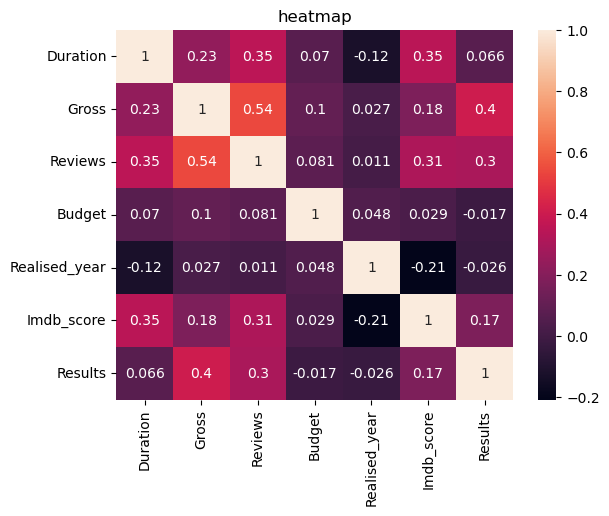

In [9]:
#Correlation Heat Map
Select_columns = ['Duration','Gross','Reviews','Budget','Realised_year','Imdb_score','Results']
mov_Selected = mov[Select_columns]

correlation = mov_Selected.corr()
sns.heatmap(correlation, annot = True )
plt.title('heatmap')
plt.show()

In [10]:
mov.Results.value_counts()

Results
0    2737
1    2042
Name: count, dtype: int64

### Train Test Spilt :

In [11]:
X = mov.drop(['Director_name','Actor_name','Genres','Movie_title',
              'Plot_keywords','Language','Country','Results'], axis = 1)
y = mov.Results

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]


array([[ 3.07639939, 11.17586802,  5.66337396, -0.28708719,  7.22450537,
         0.97614611,  0.54979041,  1.33174575],
       [ 2.67793205,  4.08968453,  2.72051493,  2.10574018,  2.48714931,
         1.28955268,  0.38783218,  0.60681796],
       [ 1.74817493,  2.37226186,  1.33517623,  0.09045562,  1.8506323 ,
         1.01594377,  1.03566511,  0.33497004]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y, random_state = 10)

In [14]:
X_train.shape

(3584, 8)

In [15]:
X_test.shape

(1195, 8)

In [16]:
y_train.value_counts()

Results
0    2053
1    1531
Name: count, dtype: int64

In [17]:
y_test.value_counts()

Results
0    684
1    511
Name: count, dtype: int64

### Using Logistic Regression for before Balancing Dataset :

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(max_iter=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Before Implemantation Accuracy :")
print(classification_report(y_test, y_pred))

Before Implemantation Accuracy :
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       684
           1       0.71      0.63      0.67       511

    accuracy                           0.73      1195
   macro avg       0.73      0.72      0.72      1195
weighted avg       0.73      0.73      0.73      1195



## Balancing Techniques :

### 1. Random Oversampling - Duplicates Minority Samples.

In [19]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_scaled, y)

print("Class distribution after oversampling:")
print(pd.Series(y_res).value_counts())


Class distribution after oversampling:
Results
1    2737
0    2737
Name: count, dtype: int64


### Logistic Regression For Random Oversampling :

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_res, y_res = ros.fit_resample(X_train, y_train)
clf = LogisticRegression(max_iter=100, random_state=10)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)
print("After Random Oversampling:")
print(classification_report(y_test, y_pred))

After Random Oversampling:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       684
           1       0.70      0.70      0.70       511

    accuracy                           0.74      1195
   macro avg       0.74      0.74      0.74      1195
weighted avg       0.74      0.74      0.74      1195



In [21]:
##################### Another Method ##############################
'''from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split original data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=42)

# Train Logistic Regression
clf = LogisticRegression(max_iter=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Original Data:")
print(classification_report(y_test, y_pred))'''

'from sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import classification_report\n\n# Split original data\nX_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=42)\n\n# Train Logistic Regression\nclf = LogisticRegression(max_iter=100, random_state=42)\nclf.fit(X_train, y_train)\n\ny_pred = clf.predict(X_test)\nprint("Original Data:")\nprint(classification_report(y_test, y_pred))'

### 2. Random Undersampling - Removes Majority Samples.

In [22]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=10)
X_res, y_res = rus.fit_resample(X_scaled, y)

print("Class distribution after undersampling:")
print(pd.Series(y_res).value_counts())

Class distribution after undersampling:
Results
0    2042
1    2042
Name: count, dtype: int64


### Logistic Regression For Random Undersampling :

In [23]:
X_res, y_res = rus.fit_resample(X_train, y_train)
clf = LogisticRegression(max_iter=100, random_state=10)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)
print("After Random Undersampling:")
print(classification_report(y_test, y_pred))

After Random Undersampling:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       684
           1       0.70      0.71      0.70       511

    accuracy                           0.74      1195
   macro avg       0.74      0.74      0.74      1195
weighted avg       0.74      0.74      0.74      1195



### 3. SMOTE (Synthetic Minority Oversampling) - Generates Synthetic Minority Samples.

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("Class distribution after SMOTE:")
print(pd.Series(y_res).value_counts())

Class distribution after SMOTE:
Results
1    2737
0    2737
Name: count, dtype: int64


###  Logistic Regression For SMOTE :

In [25]:
X_res, y_res = smote.fit_resample(X_train, y_train)
clf = LogisticRegression(max_iter=100, random_state=10)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)
print("After Random Undersampling:")
print(classification_report(y_test, y_pred))

After Random Undersampling:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       684
           1       0.70      0.71      0.71       511

    accuracy                           0.75      1195
   macro avg       0.74      0.74      0.74      1195
weighted avg       0.75      0.75      0.75      1195



### 4. SMOTE + Tomek Links (Cleaning) - Oversample + Clean Noisy Points.

In [26]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_scaled, y)

print("Class distribution after SMOTE + Tomek Links:")
print(pd.Series(y_res).value_counts())

Class distribution after SMOTE + Tomek Links:
Results
1    2559
0    2559
Name: count, dtype: int64


### LogisticRegression For SMOTE + Tomek Links :

In [27]:
clf = LogisticRegression(max_iter=100, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)
print("After SMOTE:")
print(classification_report(y_test, y_pred))

After SMOTE:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       684
           1       0.70      0.70      0.70       511

    accuracy                           0.74      1195
   macro avg       0.74      0.74      0.74      1195
weighted avg       0.74      0.74      0.74      1195



## Applied Bagging For Highest Accuracy Given Balancing Techniques :

### 2. Random Undersampling - Removes Majority Samples.

In [28]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_scaled, y)

print("Class distribution after undersampling:")
print(pd.Series(y_res).value_counts())

Class distribution after undersampling:
Results
0    2042
1    2042
Name: count, dtype: int64


### Logistic Regression For Random Undersampling :

In [29]:
X_res, y_res = smote.fit_resample(X_train, y_train)
clf = LogisticRegression(max_iter=100, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)
print("After Random Undersampling:")
print(classification_report(y_test, y_pred))

After Random Undersampling:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       684
           1       0.70      0.71      0.71       511

    accuracy                           0.75      1195
   macro avg       0.74      0.74      0.74      1195
weighted avg       0.75      0.75      0.75      1195



## Bagging Implementation :

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X_res, y_res, cv=5)
scores

array([0.97080292, 0.97198538, 0.96589525, 0.96467722, 0.97929354])

In [31]:
scores.mean()

np.float64(0.9705308640877691)

### Using Decision Tree :

In [32]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=6)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.9821428571428571

In [33]:
bag_model.score(X_test, y_test)

0.9857740585774059

In [34]:
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X_res, y_res, cv=5)
scores

array([0.98175182, 0.97685749, 0.98416565, 0.97929354, 0.98538368])

In [35]:
scores.mean()

np.float64(0.9814904380451115)

### Using Random Forest :

In [36]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X_res, y_res,cv=5)
scores.mean()

np.float64(0.9434971890549475)

## K Fold - Cross Validation Using For "Logistic Regression","SVM","Decision Tree" and "Random Forest":


In [37]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}
for model_name, model in models.items():
    scores = cross_val_score(model, X_res, y_res, cv=kf)
    print(f"🔹 Model: {model_name}")
    print(f"   Fold Accuracies: {scores}")
    print(f"   Average Accuracy: {np.mean(scores):.4f}")
    print("*" * 50)

🔹 Model: Logistic Regression
   Fold Accuracies: [0.73722628 0.74421437 0.71863581 0.74786845 0.72350792]
   Average Accuracy: 0.7343
**************************************************
🔹 Model: SVM (Linear Kernel)
   Fold Accuracies: [0.743309   0.74786845 0.72350792 0.75152253 0.727162  ]
   Average Accuracy: 0.7387
**************************************************
🔹 Model: Decision Tree
   Fold Accuracies: [0.9756691  0.96224117 0.95858709 0.97929354 0.98294762]
   Average Accuracy: 0.9717
**************************************************
🔹 Model: Random Forest
   Fold Accuracies: [0.95377129 0.95615104 0.94031669 0.95615104 0.95858709]
   Average Accuracy: 0.9530
**************************************************


## Using Boosting Method - XGBoost :

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import  cross_val_score
Models = {"XGBoost" : XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)}
for model_name, model in Models.items():
    scores = cross_val_score(model, X_res, y_res, cv=kf) 
    print(f"🔹 Model: {model_name}")
    print(f"🔹 Fold Accuracies: {scores}")
    print(f"🔹 Average Accuracy: {np.mean(scores):.4f}")
    print("*" * 50)

e:\Users\jagha\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
e:\Users\jagha\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
e:\Users\jagha\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
e:\Users\jagha\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

🔹 Model: XGBoost
🔹 Fold Accuracies: [0.98053528 0.98294762 0.97929354 0.98051157 0.98660171]
🔹 Average Accuracy: 0.9820
**************************************************


## Hyperparameter Tuning

In [40]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

# Define parameter space
param_dist = {
    'C': [1, 10, 20],
    'kernel': ['rbf', 'linear']
}

# Create RandomizedSearchCV object
rs = RandomizedSearchCV(
    estimator=svm.SVC(gamma='auto'),
    param_distributions=param_dist,
    cv=5,
    n_iter=2,
    return_train_score=False,
    random_state=42
)

# Fit to your dataset
rs.fit(X_res, y_res)  

results_df = pd.DataFrame(rs.cv_results_)[['param_C', 'param_kernel', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

# Show results
print("🔹 Best Parameters:", rs.best_params_)
print("🔹 Best Accuracy:", rs.best_score_)
display(results_df)


🔹 Best Parameters: {'kernel': 'rbf', 'C': 1}
🔹 Best Accuracy: 0.8141708971611974


,param_C,param_kernel,mean_test_score
0,1,rbf,0.814171
1,1,linear,0.738918


## Using SVM, Random Forest, Logistic Regression For Hyperparameter Tuning

In [41]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [42]:
scores = []
from sklearn.model_selection import GridSearchCV
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_res, y_res)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

mov = pd.DataFrame(scores,columns=['model','best_score','best_params'])
mov

e:\Users\jagha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
e:\Users\jagha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
e:\Users\jagha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
e:\Users\jagha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

,model,best_score,best_params
0,svm,0.870677,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.923285,{'n_estimators': 10}
2,logistic_regression,0.735265,{'C': 10}


🔹Models Compared: SVM, Random Forest, Logistic Regression

🔹Best Model: 🏆 Random Forest

🔹Accuracy Scores:

🔹Random Forest → 0.9296 (n_estimators = 10)

🔹SVM → 0.8707 (C = 20, kernel = 'rbf')

🔹Logistic Regression → 0.7353 (C = 10)

Conclusion: Random Forest shows the highest performance and is the most effective model for predicting movie success.